<a href="https://colab.research.google.com/github/Matinzr/notebook/blob/main/Tiktok_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imports and data loading**

In [1]:
#set the directory
import os
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Set the desired folder as your working directory
os.chdir('/content/drive/My Drive/TikTok_Project')

# Verify your current working directory
!pwd

Mounted at /content/drive
/content/drive/My Drive/TikTok_Project


In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset into dataframe
data = pd.read_csv('tiktok_dataset.csv')

# **Understand the data - Inspect the data**

In [3]:
data.head(10)


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [5]:
data.size

232584

In [6]:
data.shape

(19382, 12)

In [7]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


# **Understand the data - Investigate the variables**

In [8]:
data['claim_status'].value_counts()

claim      9608
opinion    9476
Name: claim_status, dtype: int64

Next, examine the engagement trends associated with each different claim status.

Start by using Boolean masking to filter the data according to claim status, then calculate the mean and median view counts for each claim status.

In [9]:
#What is the average view count of videos with "claim" status?

mask_claim = data['claim_status'] == 'claim'
claim_data = data[mask_claim]
claim_data['video_view_count'].agg([np.mean, np.median])

mean      501029.452748
median    501555.000000
Name: video_view_count, dtype: float64

In [10]:
#What is the average view count of videos with "opinion" status?

mask_opinion = data['claim_status'] == 'opinion'
opinion_data = data[mask_opinion]
opinion_data['video_view_count'].agg([np.mean,np.median])

mean      4956.43225
median    4953.00000
Name: video_view_count, dtype: float64

Now, examine trends associated with the ban status of the author.

Use groupby() to calculate how many videos there are for each combination of categories of claim status and author ban status.

In [11]:
# Get counts for each group combination of claim status and author ban status
data.groupby(['claim_status', 'author_ban_status']).count()[['video_id']]

video_id
claim_status author_ban_status          
claim        active                 6566
             banned                 1439
             under review           1603
opinion      active                 8817
             banned                  196
             under review            463

Continue investigating engagement levels, now focusing on author_ban_status.

Calculate the median video share count of each author ban status.

In [12]:
data.groupby(['author_ban_status']).median(numeric_only=True)[['video_share_count']]

,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


Use groupby() to group the data by author_ban_status, then use agg() to get the count, mean, and median of each of the following columns:

video_view_count
video_like_count
video_share_count
Remember, the argument for the agg() function is a dictionary whose keys are columns. The values for each column are a list of the calculations you want to perform.

In [13]:
data.groupby(['author_ban_status']).agg(
    {
        'video_view_count' : ['mean', 'median'],
        'video_like_count' : ['mean', 'median'],
        'video_share_count' : ['mean', 'median']
    }
)

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active               215927.039524    8616.0     71036.533836    2222.0   
banned               445845.439144  448201.0    153017.236697  105573.0   
under review         392204.836399  365245.5    128718.050339   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                 14111.466164    437.0  
banned                 29998.942508  14468.0  
under review           25774.696999   9444.0

In [14]:
# Create a likes_per_view column
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']

# Create a comments_per_view column
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']

# Create a shares_per_view column
data['shares_per_view'] = data['video_share_count'] / data['video_view_count']

Use groupby() to compile the information in each of the three newly created columns for each combination of categories of claim status and author ban status, then use agg() to calculate the count, the mean, and the median of each group.

In [15]:
data.groupby(['claim_status', 'author_ban_status']).agg({
    'likes_per_view' : ['count', 'mean', 'median'],
    'comments_per_view' : ['count', 'mean', 'median'],
    'shares_per_view' : ['count', 'mean', 'median']

})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

# **EDA on TickTok Dataset**

Since data has been inspected before I'm not going to repeat those steps again
and continue my EDA process after that basic investigation

### **part1 : Build visualizations**



**video_duration_sec**

Create a box plot to examine the spread of values in the video_duration_sec column.

Text(0.5, 1.0, 'video duration seconds')

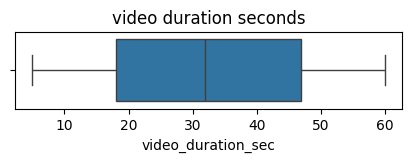

In [16]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(5,1))
sns.boxplot(
    x= data['video_duration_sec'])
plt.title('video duration seconds')

Create a histogram of the values in the video_duration_sec column to further explore the distribution of this variable.

Text(0.5, 1.0, 'video duration seconds')

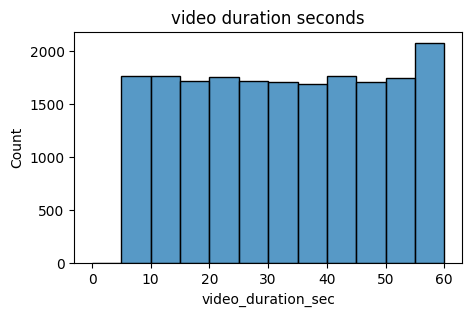

In [17]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.title('video duration seconds')

All videos are 5-60 seconds in length, and the distribution is uniform.

**video_view_count**

Create a box plot to examine the spread of values in the video_view_count column.

Text(0.5, 1.0, 'video view counts')

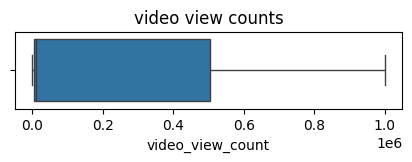

In [18]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(5,1))
sns.boxplot(
    x= data['video_view_count'])
plt.title('video view counts')

Create a histogram of the values in the video_view_count column to further explore the distribution of this variable.

Text(0.5, 1.0, 'video view counts')

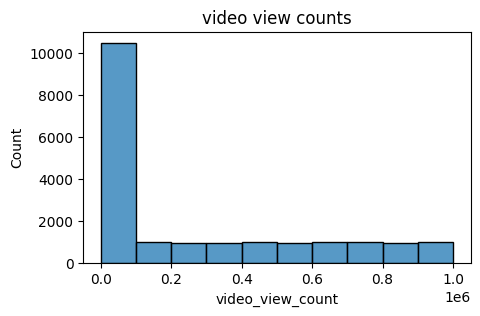

In [19]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_view_count'], bins= range(0,(10**6+1),10**5))
plt.title('video view counts')

This variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views.

**video_like_count**

Create a box plot to examine the spread of values in the video_like_count column.

Text(0.5, 1.0, 'video like counts')

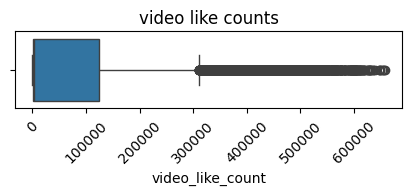

In [20]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(5,1))
sns.boxplot(
    x= data['video_like_count'])
plt.xticks(rotation = 45)
plt.title('video like counts')

Create a histogram of the values in the video_like_count column to further explore the distribution of this variable.

Text(0.5, 1.0, 'video like counts')

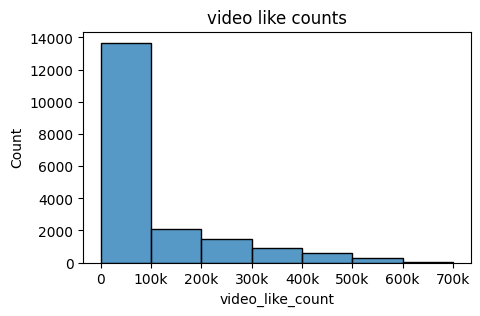

In [21]:
# Create a histogram
plt.figure(figsize=(5,3))
hist_like_plot=sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels =[0] + [str(i) + 'k' for i in range(100,701,100)]
hist_like_plot.set_xticks(range(0,7*10**5+1,10**5), labels=labels)     #***It specifies the positions of the ticks with range***
plt.title('video like counts')

There are many videos on the platform that have received less than 100,000 likes. However, as the number of likes increases beyond 100,000, the number of videos decreases gradually. This suggests that while there are a lot of videos with relatively few likes, there are fewer videos that have accumulated a very large number of likes. This pattern of distribution, where there are many instances of lower values and fewer instances of higher values, is referred to as a right-skewed distribution. In essence, it describes the distribution of likes across videos on the platform.

**video_comment_count**

Create a box plot to examine the spread of values in the video_comment_count column.

Text(0.5, 1.0, 'video comment counts')

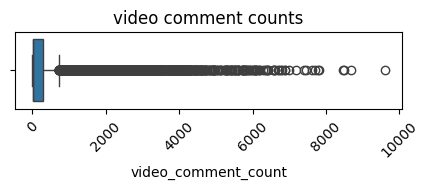

In [22]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,1))
sns.boxplot(
    x= data['video_comment_count'])
plt.xticks(rotation = 45)
plt.title('video comment counts')

Create a histogram of the values in the video_comment_count column to further explore the distribution of this variable.

Text(0.5, 1.0, 'video comment counts')

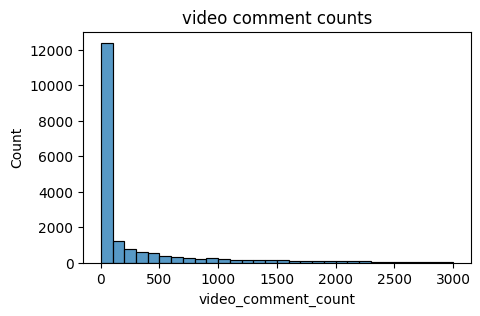

In [23]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_comment_count'], bins= range(0,(3001),100))
plt.title('video comment counts')

Again, the vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.

**video_share_count**

Create a box plot to examine the spread of values in the video_share_count column.

Text(0.5, 1.0, 'video share counts')

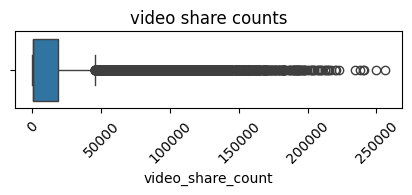

In [24]:
plt.figure(figsize=(5,1))
sns.boxplot(
    x= data['video_share_count'])
plt.xticks(rotation = 45)
plt.title('video share counts')

Create a histogram of the values in the video_share_count column to further explore the distribution of this variable.

Text(0.5, 1.0, 'video share counts')

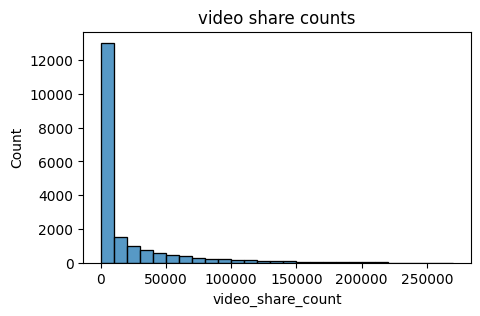

In [25]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0,(270001),10**4))
plt.title('video share counts')

The overwhelming majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.

**video_download_count**

Create a box plot to examine the spread of values in the video_download_count column.

Text(0.5, 1.0, 'video download counts')

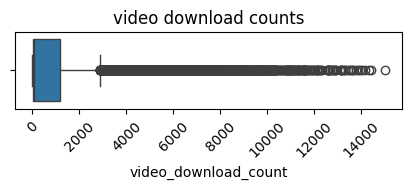

In [26]:
plt.figure(figsize=(5,1))
sns.boxplot(
    x= data['video_download_count'])
plt.xticks(rotation = 45)
plt.title('video download counts')

Create a histogram of the values in the video_download_count column to further explore the distribution of this variable.

Text(0.5, 1.0, 'video download counts')

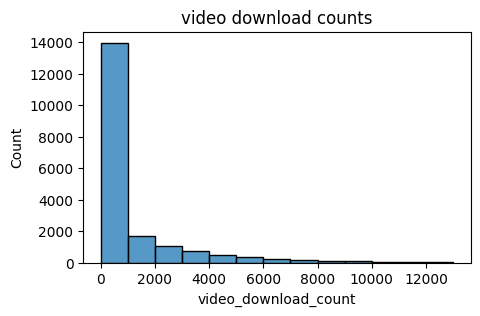

In [27]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_download_count'], bins=range(0,14000,1000))
plt.title('video download counts')

The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

**Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

Text(0.5, 1.0, 'Claims by verification status histogram')

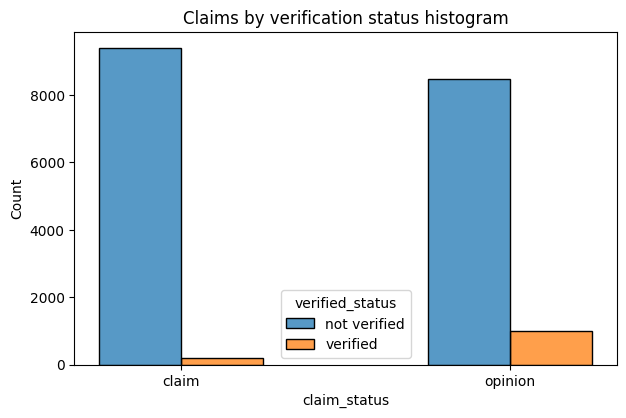

In [28]:
plt.figure(figsize=(7,4.32))
sns.histplot(
    data=data,
    x='claim_status',
    hue='verified_status',
    multiple='dodge',
    shrink= 0.5
)
plt.title('Claims by verification status histogram')

 There are far fewer verified users than unverified users, but if a user is verified, they are much more likely to post opinions.

**Claim status by author ban status**



In [29]:
# Get counts for each group combination of claim status and author ban status
data.groupby(['claim_status', 'author_ban_status']).count()[['video_id']]

video_id
claim_status author_ban_status          
claim        active                 6566
             banned                 1439
             under review           1603
opinion      active                 8817
             banned                  196
             under review            463

Use histogram to plot this information

Text(0.5, 1.0, 'Claim status by author ban status - counts')

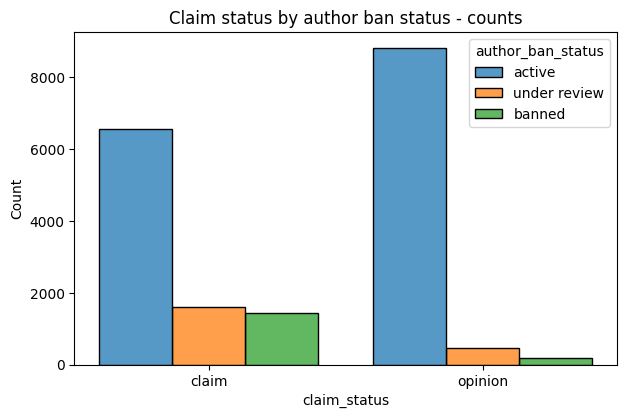

In [30]:
plt.figure(figsize=(7,4.32))
sns.histplot(
    data=data,
    x='claim_status',
    hue='author_ban_status',
    multiple='dodge',
    shrink= 0.8,
    hue_order=['active', 'under review', 'banned']
)
plt.title('Claim status by author ban status - counts')

For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

**Median view counts by ban status**

In [31]:
counts_by_ban= data.groupby(['author_ban_status']).median()['video_view_count'].reset_index()
counts_by_ban

<ipython-input-31-71fafd420963>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  counts_by_ban= data.groupby(['author_ban_status']).median()['video_view_count'].reset_index()


,author_ban_status,video_view_count
0,active,8616.0
1,banned,448201.0
2,under review,365245.5


<ipython-input-32-64e9ab67400c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


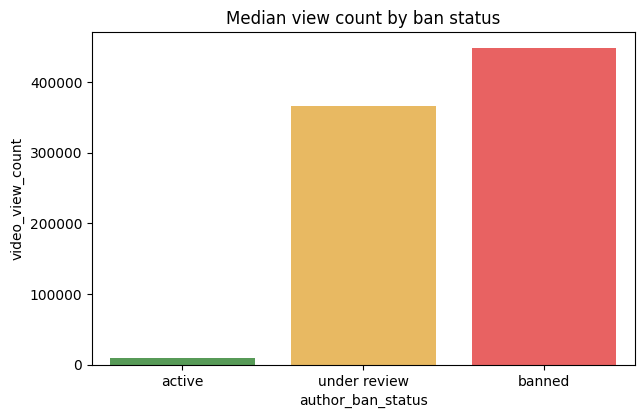

In [32]:
plt.figure(figsize=(7,4.32))
sns.barplot(
    data=counts_by_ban,
    x='author_ban_status',
    y='video_view_count',
    order=['active', 'under review', 'banned'],
    palette={'active':'green', 'under review':'orange', 'banned':'red'},
    alpha= 0.7
)
plt.title('Median view count by ban status')
plt.show()

The median view counts for non-active authors are many times greater than the median view count for active authors. Since you know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, ***then video_view_count might be a good indicator of claim status.***

**`Total view counts for claim status`**

---



In [42]:
counts_for_claim= data.groupby(['claim_status'])['video_view_count'].median().reset_index()
counts_for_claim

,claim_status,video_view_count
0,claim,501555.0
1,opinion,4953.0


Text(0.5, 1.0, 'Total views by video claim status')

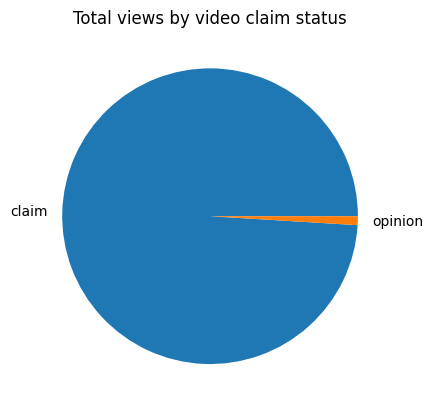

In [41]:
plt.pie(data.groupby(['claim_status'])['video_view_count'].sum(),  labels=['claim', 'opinion'])
plt.title('Total views by video claim status')

The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

### **part2 : Determine outliers**

In [43]:
cols = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

In [53]:
for col in cols:

  iqr = data[col].quantile(0.75) - data[col].quantile(0.25)
  median= data[col].median()
  outlier_threshold = median + 1.5 * iqr

  # Count the number of values that exceed the outlier threshold
  outliers = data[col].apply(lambda x: x > outlier_threshold)
  outlier_count = outliers.sum()

  #print the results
  print(f'Number of outliers, {col}: {outlier_count} ')

Number of outliers, video_view_count: 2343 
Number of outliers, video_like_count: 3468 
Number of outliers, video_share_count: 3732 
Number of outliers, video_download_count: 3733 
Number of outliers, video_comment_count: 3882 


Create a scatterplot of `video_view_count` versus `video_like_count` for opinions only

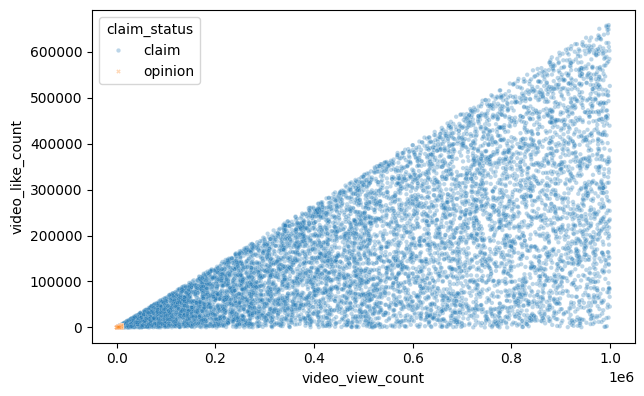

In [62]:
#scatter plot
plt.figure(figsize=(7,4.32))
sns.scatterplot(
    data=data,
    x= 'video_view_count',
    y= 'video_like_count',
    hue= 'claim_status',
    style='claim_status',
    alpha = 0.3,
    s=10
)

plt.show()

Create a scatterplot of `video_view_count` versus `video_like_count` for opinions only

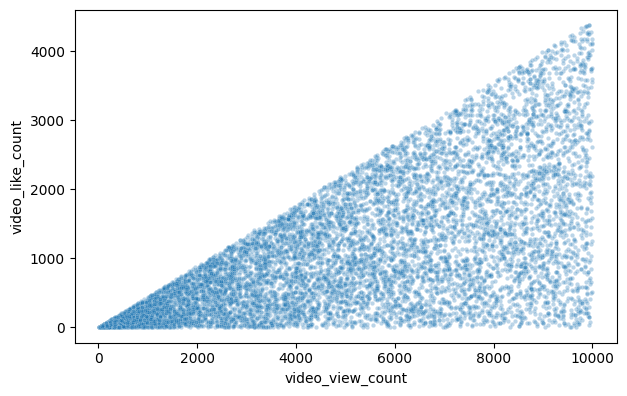

In [63]:
plt.figure(figsize=(7,4.32))

opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()

# **Exploratory Data Analysis (EDA) - Summary**

The exploratory data analysis conducted from TikTok’s data team revealed many considerations for the classification model, including missing values, “claims” to “opinions” balance, and overall distribution of data variables. The two key insights from this analysis were:



*   Null values:
Over 200 null values were found in 7 different columns. As a result, future modeling should consider the null values to avoid making insights that would assume complete data. Further analysis is necessary to investigate the reason for these null values, and their impact on future statistical analysis or model building.

*   Skewed data distribution:
Video view and like counts are all concentrated on low end of 1,000 for opinions. Therefore, the data distribution is right-skewed, which will inform the models and model types that will be built.



